# Assignment – Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data=pd.read_csv(r"C:\Users\sruth\OneDrive\Desktop\titanic_dataset .csv")

## Basic Details of dataset

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [6]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


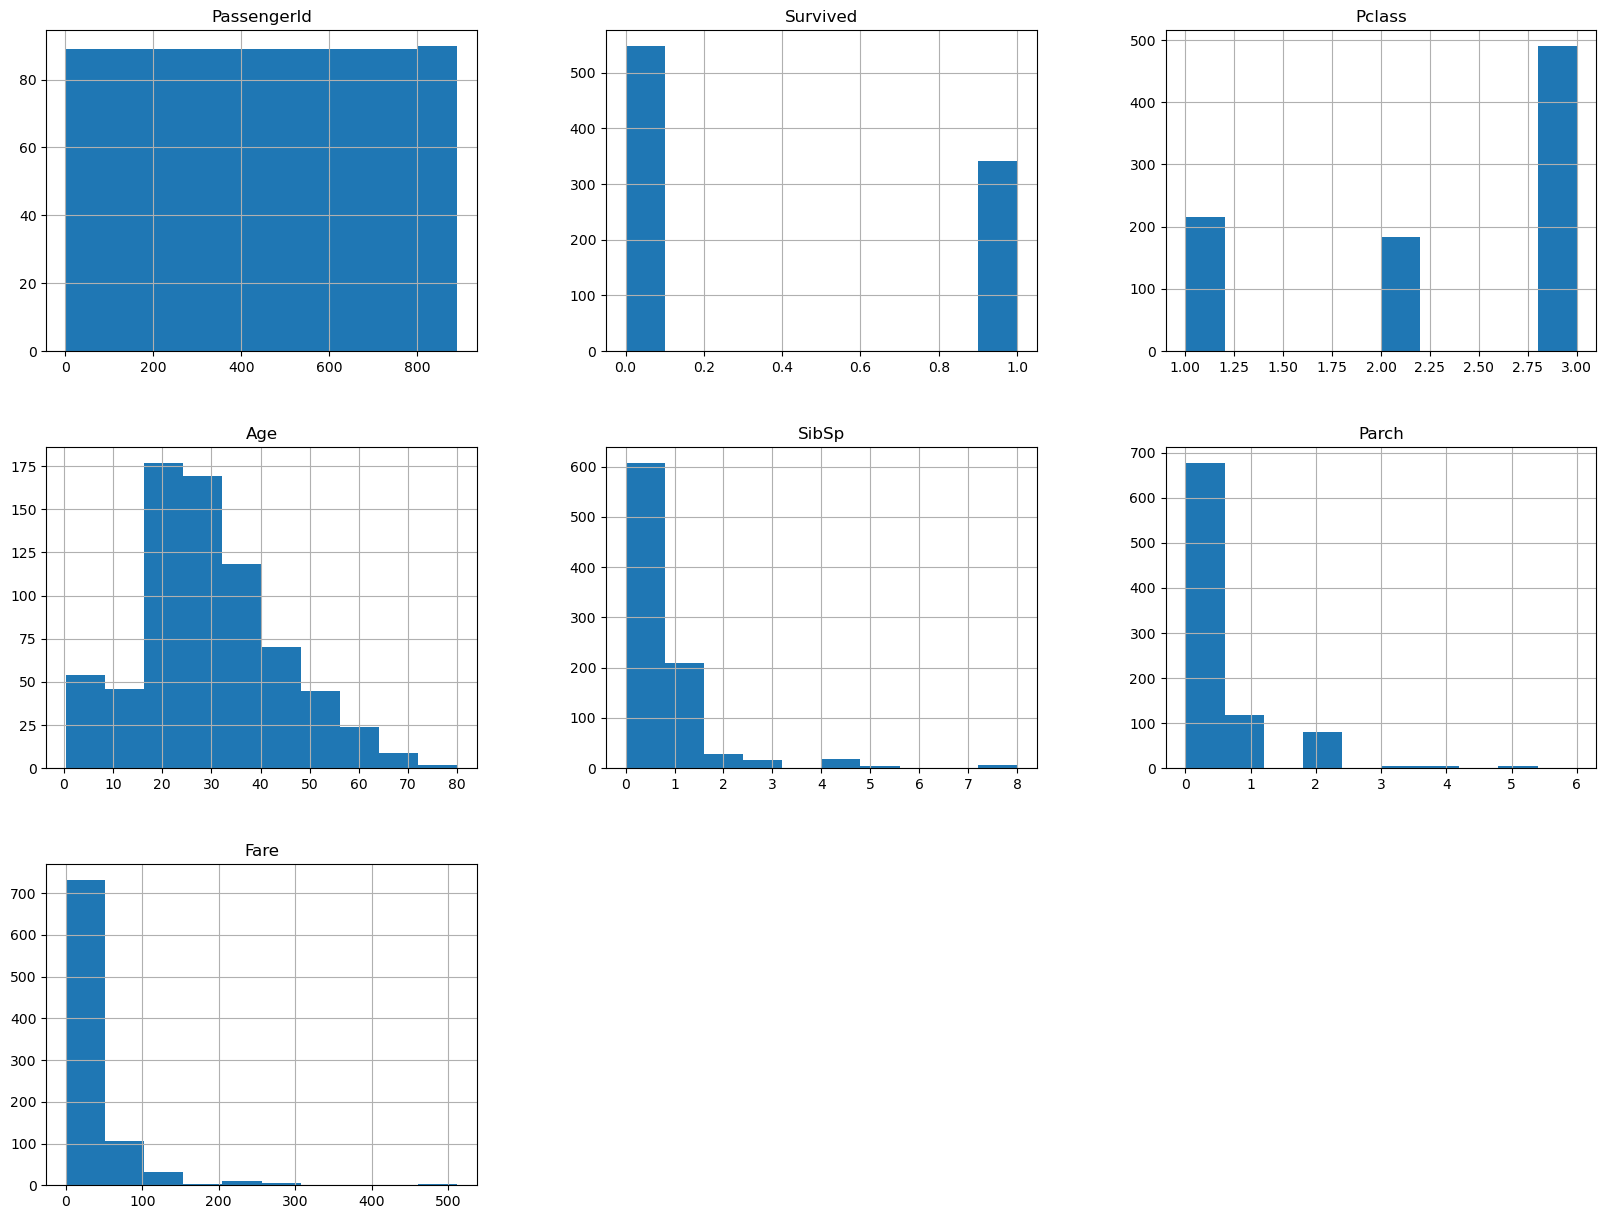

In [10]:
#plotting the data distribution
freqgraph = data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

## Missing value Handling

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [14]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode().values[0])

In [15]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().values[0])

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

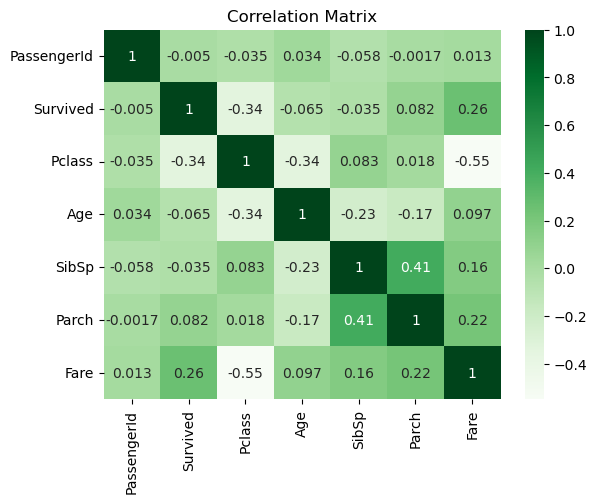

In [17]:
# Plot correlation matrix
#plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()

In [18]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

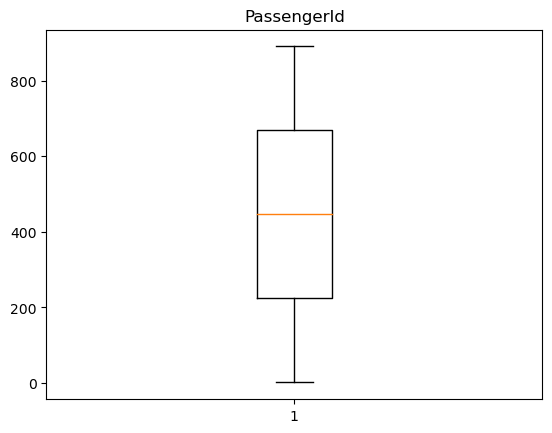

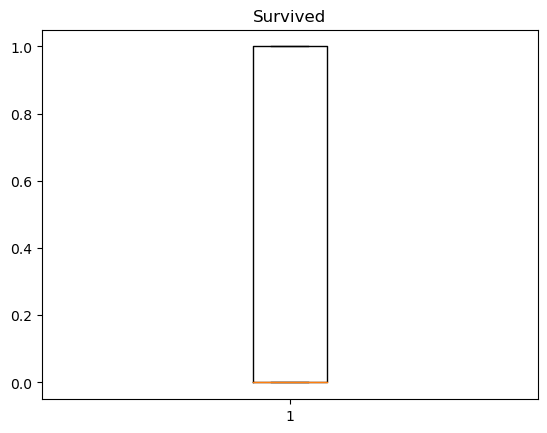

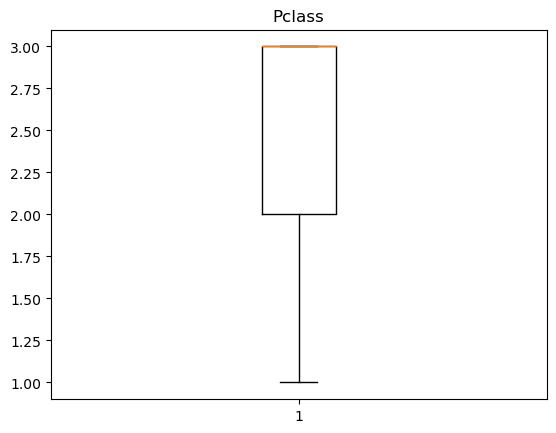

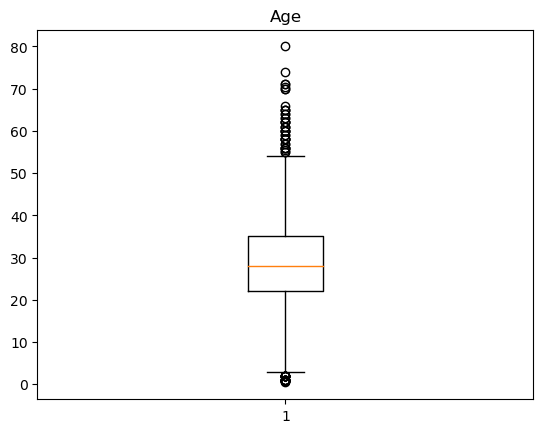

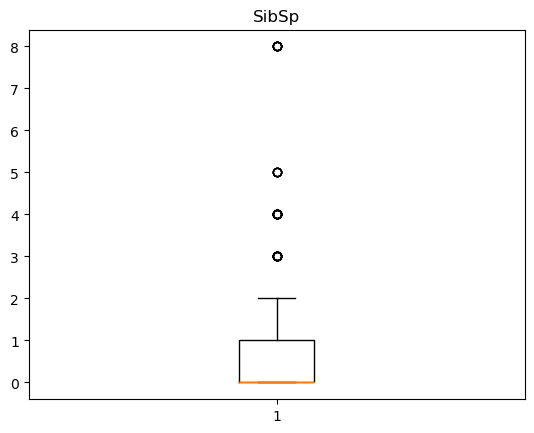

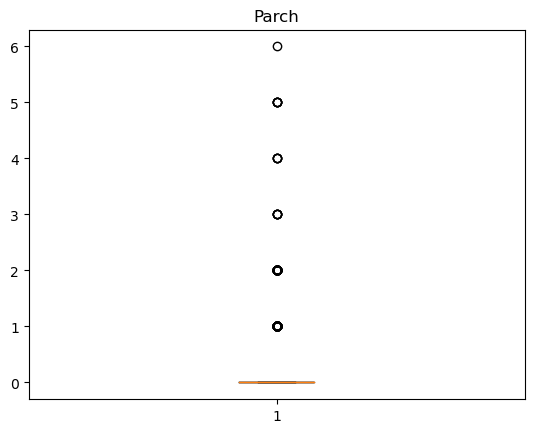

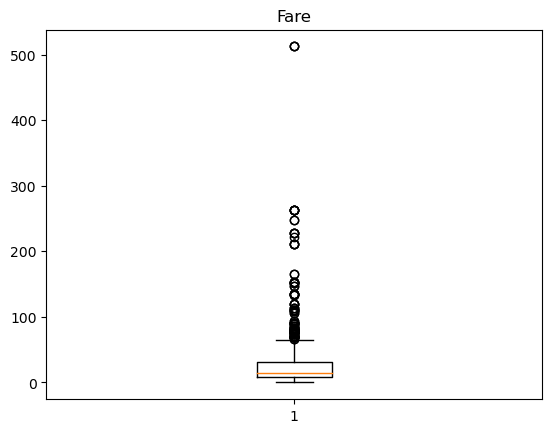

In [20]:
#Boxplot for finding outliers
num_cols = ['PassengerId', 'Survived', 'Pclass','Age', 'SibSp','Parch','Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

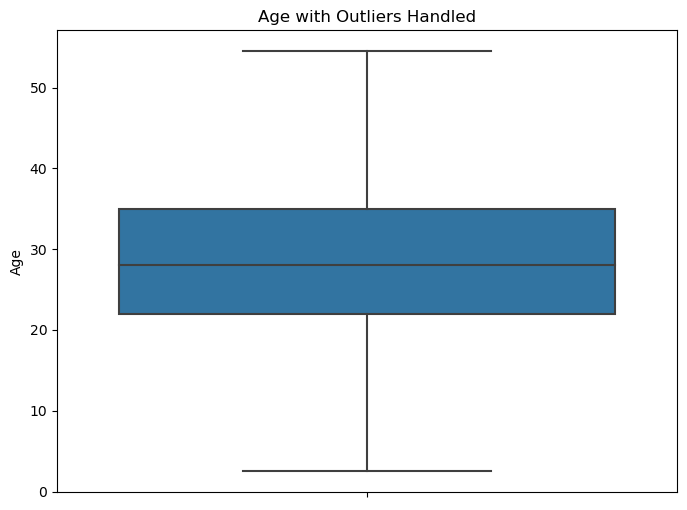

In [21]:
# Calculate the lower and upper limits for Winsorization
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Apply Winsorization to handle outliers
data['Age'] = np.where(data['Age'] < low_lim, low_lim, data['Age'])
data['Age'] = np.where(data['Age'] > up_lim, up_lim, data['Age'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Age')
plt.title("Age with Outliers Handled")
plt.ylabel("Age")
plt.show()

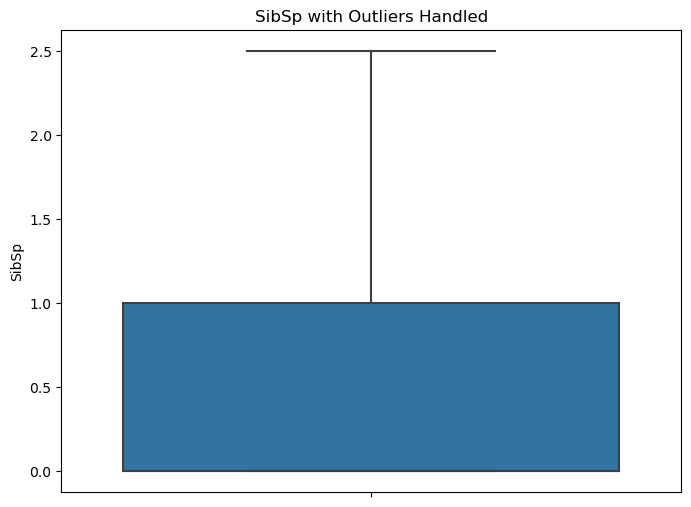

In [22]:
# Calculate the lower and upper limits for Winsorization
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Apply Winsorization to handle outliers
data['SibSp'] = np.where(data['SibSp'] < low_lim, low_lim, data['SibSp'])
data['SibSp'] = np.where(data['SibSp'] > up_lim, up_lim, data['SibSp'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='SibSp')
plt.title("SibSp with Outliers Handled")
plt.ylabel("SibSp")
plt.show()

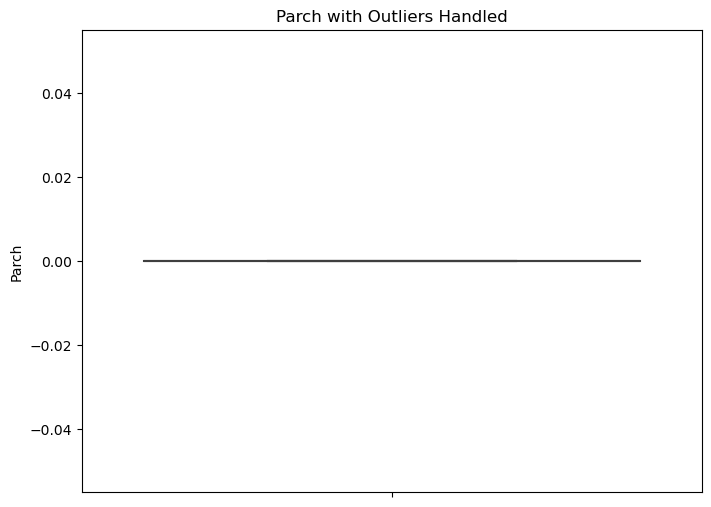

In [23]:
# Calculate the lower and upper limits for Winsorization
Q1 = data['Parch'].quantile(0.25)
Q3 = data['Parch'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Apply Winsorization to handle outliers
data['Parch'] = np.where(data['Parch'] < low_lim, low_lim, data['Parch'])
data['Parch'] = np.where(data['Parch'] > up_lim, up_lim, data['Parch'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Parch')
plt.title("Parch with Outliers Handled")
plt.ylabel("Parch")
plt.show()

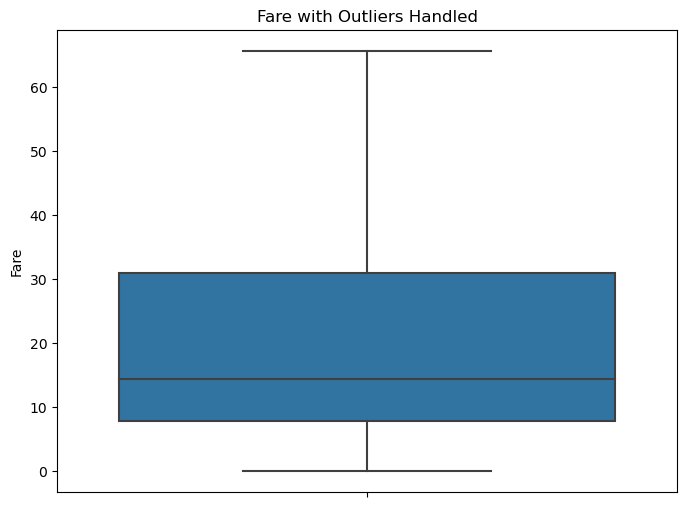

In [24]:
# Calculate the lower and upper limits for Winsorization
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Apply Winsorization to handle outliers
data['Fare'] = np.where(data['Fare'] < low_lim, low_lim, data['Fare'])
data['Fare'] = np.where(data['Fare'] > up_lim, up_lim, data['Fare'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Fare')
plt.title("Fare with Outliers Handled")
plt.ylabel("Fare")
plt.show()

In [25]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
columns_to_encode = ['Sex', 'Embarked']  # Specify the columns to be encoded

data_encoded = pd.get_dummies(data, columns=columns_to_encode)

In [27]:
# Feature scaling (optional but can improve some models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['Age', 'Fare']] = scaler.fit_transform(data_encoded[['Age', 'Fare']])

In [28]:
data= data_encoded

In [29]:
columns_to_drop = ['Survived', 'PassengerId', 'Ticket', 'Name','Cabin']
X = data.drop(columns_to_drop, axis=1)
y = data['Survived']


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
df=data_encoded

In [32]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.583432,1.0,0.0,-0.820552,0,1,0,0,1
1,1,0.742685,1.0,0.0,2.031623,1,0,1,0,0
2,3,-0.251903,0.0,0.0,-0.787578,1,0,0,0,1
3,1,0.494038,1.0,0.0,1.419297,1,0,0,0,1
4,3,0.494038,0.0,0.0,-0.781471,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,-0.169020,0.0,0.0,-0.539655,0,1,0,0,1
887,1,-0.832079,0.0,0.0,0.290823,1,0,0,0,1
888,3,-0.086138,1.0,0.0,-0.029155,1,0,0,0,1
889,1,-0.251903,0.0,0.0,0.290823,0,1,1,0,0


## kNN 

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [34]:
from sklearn.neighbors import KNeighborsClassifier
matric =[]
neighbors =np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred_knn)
    matric.append(acc)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
import matplotlib.pyplot as plt

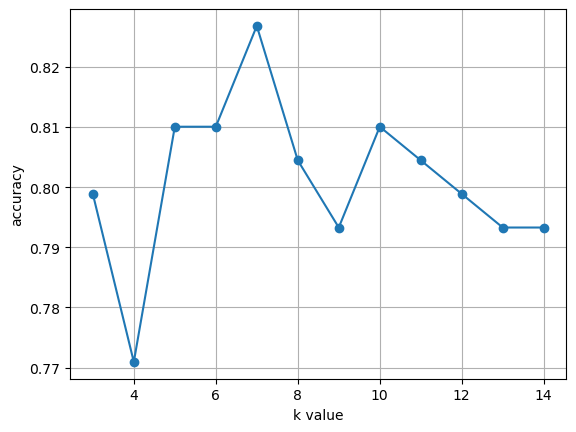

In [36]:
plt.plot(neighbors,matric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [37]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn))
print('Recall = ',recall_score(y_test,y_pred_knn))
print('f1 score =',f1_score(y_test,y_pred_knn))

Accuracy =  0.770949720670391
precision =  0.8235294117647058
Recall =  0.5675675675675675
f1 score = 0.6719999999999999


In [39]:
confusion_matrix(y_test,y_pred_knn)

array([[96,  9],
       [32, 42]], dtype=int64)

## SVM model 

In [40]:
from sklearn.svm import SVC
svmclf =SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [41]:
y_pred=svmclf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))


Accuracy is: 0.7821229050279329


In [43]:
print(confusion_matrix(y_test,y_pred))

[[88 17]
 [22 52]]


# K fold validation


In [44]:
from sklearn.model_selection import KFold

In [45]:
kfold_val=KFold(10)

In [46]:
for train_index,test_index in kfold_val.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
kfcv_score=cross_val_score(classifier,X,y,cv=kfold_val)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [49]:
kfcv_score

array([0.75555556, 0.85393258, 0.78651685, 0.7752809 , 0.83146067,
       0.83146067, 0.78651685, 0.76404494, 0.84269663, 0.76404494])

In [50]:
np.mean(kfcv_score)

0.7991510611735332

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
#SVM
kfcv_score_svm=cross_val_score(svmclf,X,y,cv=kfold_val)

In [53]:
kfcv_score_svm

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [54]:
np.mean(kfcv_score_svm)

0.786729088639201

In [55]:
# KFold average accuracy
print("Average Accuracy (kNN):", np.mean(kfcv_score))
print("Average Accuracy (SVM):", np.mean(kfcv_score_svm))

Average Accuracy (kNN): 0.7991510611735332
Average Accuracy (SVM): 0.786729088639201


# Stratified  K Fold

In [56]:
from sklearn.model_selection import StratifiedKFold
skfold_val=StratifiedKFold(n_splits=10)

In [57]:
for train_index,test_index in skfold_val.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [58]:
#kNN
skcv_score=cross_val_score(classifier,X,y,cv=skfold_val)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [59]:
skcv_score

array([0.76666667, 0.78651685, 0.7752809 , 0.79775281, 0.85393258,
       0.80898876, 0.80898876, 0.76404494, 0.80898876, 0.75280899])

In [60]:
np.mean(skcv_score)

0.7923970037453183

In [61]:
#svm
skcv_score_svm=cross_val_score(svmclf,X,y,cv=skfold_val)

In [62]:
skcv_score_svm

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [63]:
np.mean(skcv_score_svm)

0.786729088639201

In [64]:
#Stratified KFold accuracy
print("Average Accuracy (kNN):", np.mean(skcv_score))
print("Average Accuracy (SVM):", np.mean(skcv_score_svm))

Average Accuracy (kNN): 0.7923970037453183
Average Accuracy (SVM): 0.786729088639201


In both K Fold and Stratified K Fold cross validation techniques kNN has higher Average accuracy  than SVM. 